In [1]:
from models.unet import UNET
import torch

seg_model = UNET()
ckpt = torch.load('archive/checkpoints/seg.pth')
seg_model.load_state_dict(ckpt)

/home/hssun/anaconda3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<All keys matched successfully>

In [2]:
from data.dataset import TrainDataset, get_train_transforms

class myargs():
    def __init__(self):
        super(myargs, self).__init__()
        self.preprocessed = False

args = myargs()
transform = get_train_transforms(img_size=(224,224))
dataset = TrainDataset(data='AMD', args=args, transform=transform)
for i in dataset:
    img = i['image']
    break

In [7]:
x = seg_model(img.unsqueeze(0))[0]

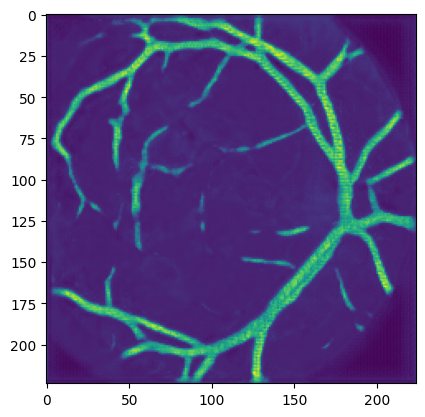

In [8]:
from matplotlib import pyplot as plt
plt.imshow(x[0,0].detach().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


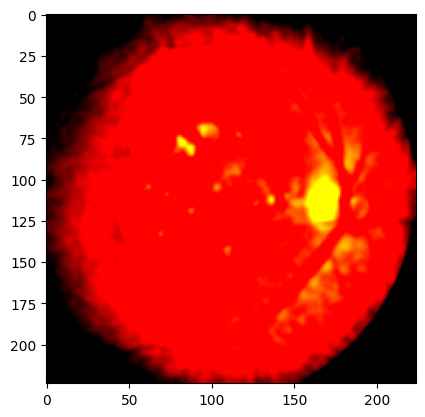

In [9]:
plt.imshow(img.permute(1,2,0).detach().numpy())

In [10]:
from models.unet import encoder_block, decoder_block

seg_feat = seg_model(img.unsqueeze(0))[-1]

In [11]:
seg_feat.shape

torch.Size([1, 1024, 14, 14])

In [13]:
from models.encoder_decoder import Encoder

encoder = Encoder()

In [15]:
encoder(img.unsqueeze(0)).shape

torch.Size([1, 2048, 7, 7])

In [19]:
from models.resnet import resnet50

last_layer = resnet50(pretrained=True).layer4

In [21]:
last_layer(seg_feat).shape

torch.Size([1, 2048, 7, 7])

In [26]:
torch.concat([encoder(img.unsqueeze(0)), last_layer(seg_feat)], axis=1).shape

torch.Size([1, 4096, 7, 7])